In [2]:
# import library

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
import plotly.express as px

In [5]:
# read the dataset

df = pd.read_csv("C:/Users/q1157/OneDrive/桌面/cycling_permanent_counts_daily.csv")

# Convert 'dt' (date) column to datetime format
df['dt'] = pd.to_datetime(df['dt'])

In [6]:
# extract Year and Month from the 'dt' column

df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month_name() 

In [7]:
# Group by year and month, then calculate the mean daily volume
monthly_avg = df.groupby(['year', 'month'])['daily_volume'].mean().unstack()

In [8]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(columns=months_order).fillna(0)

In [9]:
# identify each month's color
month_colors= {
    'January': '#1f77b4', 'February': '#ff7f0e', 'March': '#2ca02c',
    'April': '#d62728', 'May': '#9467bd', 'June': '#8c564b',
    'July': '#e377c2', 'August': '#7f7f7f', 'September': '#bcbd22',
    'October': '#17becf', 'November': '#aec7e8', 'December': '#ffbb78'
}

<Figure size 2000x1600 with 0 Axes>

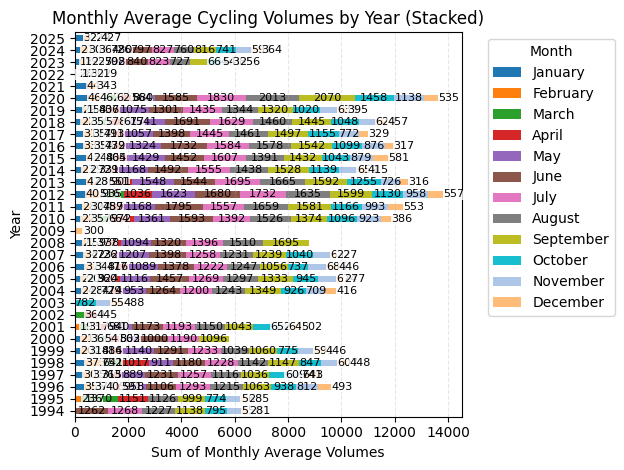

In [10]:
plt.figure(figsize=(20, 16))
ax = monthly_avg.plot(kind='barh', stacked=True, color=[month_colors[m] for m in monthly_avg.columns])
plt.xlabel('Sum of Monthly Average Volumes')
plt.ylabel('Year')
plt.title('Monthly Average Cycling Volumes by Year (Stacked)')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.3)
for i, (year, row) in enumerate(monthly_avg.iterrows()):
    cumulative = 0
    for month in months_order:
        value = row[month]
        if value > 0:
            # make the large section label inside, small outside
            if value < monthly_avg.sum(axis=1).max() * 0.05:  # if it is smaller than 5% of the max
                ax.text(cumulative + value, i, f"{int(value)}", 
                       ha='left', va='center', fontsize=8, color='black',
                       bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=0.3))
            else:
                ax.text(cumulative + value/2, i, f"{int(value)}", 
                       ha='center', va='center', fontsize=8, color='black')
        cumulative += value


plt.tight_layout()
plt.show()

In [11]:
pip install --upgrade nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [ ]:

# draw interactive figures for better understand
fig = px.bar(monthly_avg, orientation='h', barmode='stack')

# get all year
years = monthly_avg.index.tolist()

# force to show all year label
fig.update_layout(
    yaxis=dict(
        tickmode='array',
        tickvals=years,       # at spefic location
        ticktext=years        # Show year numbers
    )
)

fig.show()